In [ ]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_excel("/content/gdrive/MyDrive/PSL_PRICE_DATA.xls", index_col='DATEOFUPDATE', parse_dates=True)

In [ ]:
aa = data[data['PREFIX'].str.contains('AA')]
bp = data[data['PREFIX'].str.contains('BP')]
ab = data[data['PREFIX'].str.contains('AB')]
bl = data[data['PREFIX'].str.contains('BL')]
an = data[data['PREFIX'].str.contains('AN')]
am = data[data['PREFIX'].str.contains('AM')]

In [ ]:
p1 = aa.MTLCODE.unique()
p2 = bp.MTLCODE.unique()
p3 = ab.MTLCODE.unique()
p4 = bl.MTLCODE.unique()
p5 = an.MTLCODE.unique()
p6 = am.MTLCODE.unique()

In [ ]:
print(np.intersect1d(p1, p2))
print(np.intersect1d(p1, p3))
print(np.intersect1d(p1, p4))
print(np.intersect1d(p1, p5))
print(np.intersect1d(p1, p6))
print(np.intersect1d(p2, p3))
print(np.intersect1d(p2, p4))
print(np.intersect1d(p2, p5))
print(np.intersect1d(p2, p6))
print(np.intersect1d(p3, p4))
print(np.intersect1d(p3, p5))
print(np.intersect1d(p3, p6))
print(np.intersect1d(p4, p5))
print(np.intersect1d(p4, p6))
print(np.intersect1d(p5, p6))

[1010212095 2851241087]
[2111708011 2111708046 2111709018]
[]
[]
[]
[1232389013]
[2111572012 9095113566]
[]
[]
[]
[]
[]
[]
[]
[]


In [ ]:
df=pd.read_excel("/content/gdrive/MyDrive/PSL_PRICE_DATA.xls")

In [ ]:
df.loc[df["DATEOFUPDATE"] == "2013-04-26"]

,DEPT,PREFIX,MTLCODE,RATE,DATEOFUPDATE,IMP_IND
1081,204,AA,1010212222,510.83,2013-04-26,2
1082,204,BP,2511591014,297.75,2013-04-26,1
1083,204,BP,2511591014,296.67,2013-04-26,2
1084,204,BP,2564093019,96.75,2013-04-26,2
1085,204,BP,2851241087,346.23,2013-04-26,2
...,...,...,...,...,...,...
1209,346,BP,7242399084,178.01,2013-04-26,2
1210,346,AA,7701915044,11307.55,2013-04-26,2
1211,346,AA,7704015036,11373.18,2013-04-26,2
1212,346,AA,7704022032,30775.21,2013-04-26,2


In [ ]:
pref = data.PREFIX.unique()
multi = data.MTLCODE.unique()
imp_i = data.IMP_IND.unique()
depth = data.DEPT.unique()
pref

array(['AA', 'BP', 'AB', 'BL', 'AN', 'AM'], dtype=object)

In [ ]:
multi

array([1010212222, 2511591014, 2564093019, 2851241087, 2851484036,
       7704015036, 7704022032, 7705914018, 9023028180, 9024009812,
       9024030170, 9024031419, 9024037174, 9033032317, 9043028037,
       9044030116, 9063026277, 9063026650, 9064004102, 9083027163,
       9083031900, 9084011856, 9084011872, 9084256247, 9093033344,
       1010212052, 1232389013, 2111572012, 2111708011, 2111708020,
       2111708038, 2111708046, 2111708054, 2111708070, 2111708089,
       2111709018, 2111709026, 2111709034, 2111709077, 2311607103,
       2311607111, 2311699016, 5530002005, 5981702052, 7242399084,
       7701915044, 7704057022, 1010112104, 1010212010, 1010212028,
       1010212036, 1010212044, 1010212079, 1010212095, 1010212990,
       1010412051, 1011052350, 1011715074, 1011715112, 9065041397,
       9095002888, 9095113566, 2371883018, 2851288016, 2851369024,
       2851569031, 4421956015, 4430168016])

In [ ]:
imp_i

array([2, 1, 4, 3])

In [ ]:
depth

array([204, 206, 209, 217, 346])

In [ ]:
answer = pd.DataFrame()
ad = pd.DataFrame()
rf = pd.DataFrame()

In [ ]:
ts = data['RATE'].resample('A').mean()

In [ ]:
from pmdarima import auto_arima
ss = auto_arima( ts,trace = True ,suppress_warnings=True)
ss.summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=260.649, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=254.079, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=254.916, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255.085, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=256.005, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=256.904, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.352 seconds


<function pmdarima.arima.arima.ARIMA.summary>

In [ ]:
for dep in depth:
  for imp in imp_i:
    for pre in pref :
      for m in multi :
        d = data.loc[data["DEPT"] == dep ]
        d = d.loc[d["IMP_IND"] == imp ]
        d = d.loc[d["PREFIX"] == f"{pre}" ]#, data["MTLCODE"] == f"{m}" ]
        d = d.loc[d["MTLCODE"] == m ]
        ts = d['RATE'].resample('A').mean()
        train=ts[:15]
        test=ts[15:]
        if test.size != 0:
          try :
            model = sm.tsa.ARIMA(train, order=(0,1,0))
            model = model.fit()
            x=len(train)
            y=(len(train) + len(ts)-1)
            pred = model.predict(start = x , end=y ,typ = "levels")
            pr = pred [:3]
            p = pd.DataFrame(pr)
            ad = pd.concat([ad, p])
            print('ad')
            pred = pred [3:5]
            df = pd.DataFrame(pred)
            df["DEPT"] = dep
            df["IMP_IND"] = imp
            df["PREFIX"] = f"{pre}"
            df["MTLCODE"] = m
            answer = pd.concat([answer, df])
            r = pd.DataFrame(test)
            rf = pd.concat([rf, r])
            print('rf')
            print("run")
          except Exception:
            print (f"no data with fallowing variable dept = {dep} imp ind = {imp} pre = {pre} multicode = {m}")

ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ad
rf
run
ad
rf
run
ad
rf
run


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ad
rf
run
ad
rf
run
ad
rf
run


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run
ad
rf
run


In [ ]:

answer

,predicted_mean,DEPT,IMP_IND,PREFIX,MTLCODE
2023-12-31,510.83,204,2,AA,1010212222
2024-12-31,510.83,204,2,AA,1010212222
2023-12-31,5904.50,204,2,AA,7704015036
2024-12-31,5904.50,204,2,AA,7704015036
2023-12-31,8798.00,204,2,AA,7704022032
...,...,...,...,...,...
2024-12-31,28.31,346,2,BP,1010212044
2023-12-31,64.53,346,2,BP,1010212079
2024-12-31,64.53,346,2,BP,1010212079
2023-12-31,52.28,346,2,BP,1010412051


In [ ]:

ts = data['RATE'].resample('A').mean()
train=ts[:15]
test=ts[15:]



In [ ]:
ts

DATEOFUPDATE
2005-12-31    2956.234063
2006-12-31    3353.143435
2007-12-31    3778.044580
2008-12-31    3515.164091
2009-12-31    4360.647895
2010-12-31    4852.133088
2011-12-31    4920.090138
2012-12-31    5365.281172
2013-12-31    4902.951429
2014-12-31    5225.542868
2015-12-31    4833.075113
2016-12-31    4822.203609
2017-12-31    5453.455968
2018-12-31    5120.220726
2019-12-31    5182.738226
2020-12-31    5383.278871
2021-12-31    5571.942097
2022-12-31    6236.240081
Freq: A-DEC, Name: RATE, dtype: float64

In [ ]:
p

,predicted_mean
2020-12-31,52.28
2021-12-31,52.28
2022-12-31,52.28


In [ ]:
rf

,RATE
DATEOFUPDATE,
2020-12-31,510.83
2021-12-31,510.83
2022-12-31,510.83
2020-12-31,5904.50
2021-12-31,7047.00
...,...
2021-12-31,85.06
2022-12-31,85.06
2020-12-31,58.37


In [ ]:
ad

,predicted_mean
2020-12-31,510.83
2021-12-31,510.83
2022-12-31,510.83
2020-12-31,5904.50
2021-12-31,5904.50
...,...
2021-12-31,64.53
2022-12-31,64.53
2020-12-31,52.28
2021-12-31,52.28


In [ ]:
train

DATEOFUPDATE
2005-12-31    2956.234063
2006-12-31    3353.143435
2007-12-31    3778.044580
2008-12-31    3515.164091
2009-12-31    4360.647895
2010-12-31    4852.133088
2011-12-31    4920.090138
2012-12-31    5365.281172
2013-12-31    4902.951429
2014-12-31    5225.542868
2015-12-31    4833.075113
2016-12-31    4822.203609
2017-12-31    5453.455968
2018-12-31    5120.220726
2019-12-31    5182.738226
Freq: A-DEC, Name: RATE, dtype: float64

In [ ]:
test

DATEOFUPDATE
2020-12-31    5383.278871
2021-12-31    5571.942097
2022-12-31    6236.240081
Freq: A-DEC, Name: RATE, dtype: float64

In [ ]:
pr

2020-12-31    52.28
2021-12-31    52.28
2022-12-31    52.28
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [ ]:
error = pd.DataFrame()

In [ ]:
error = pd.DataFrame(rf['RATE'] - ad['predicted_mean']).dropna()
error

,0
DATEOFUPDATE,
2020-12-31,0.00
2021-12-31,0.00
2022-12-31,0.00
2020-12-31,0.00
2021-12-31,1142.50
...,...
2021-12-31,20.53
2022-12-31,20.53
2020-12-31,6.09


In [ ]:
percentage = error[0]/rf['RATE'] * 100
percentage

DATEOFUPDATE
2020-12-31     0.000000
2021-12-31     0.000000
2022-12-31     0.000000
2020-12-31     0.000000
2021-12-31    16.212573
                ...    
2021-12-31    24.135904
2022-12-31    24.135904
2020-12-31    10.433442
2021-12-31    10.433442
2022-12-31    10.433442
Length: 369, dtype: float64

In [ ]:
percentage.mean()

-0.9075223444402682

In [ ]:
#pr

In [ ]:
#pred[:3]

In [ ]:
#ts = data['RATE'].resample('A').mean()

In [ ]:
#ts

In [ ]:
#ts[15:]

In [ ]:
l1 = answer.loc['2023-12-31']
l2 = answer.loc['2024-12-31']
l3 = pd.concat([l1, l2])

#l3 = l3.drop(columns=['DEPT', 'IMP_IND', 'PREFIX', 'MTLCODE'])
l3

,predicted_mean,DEPT,IMP_IND,PREFIX,MTLCODE
2023-12-31,510.83,204,2,AA,1010212222
2023-12-31,5904.50,204,2,AA,7704015036
2023-12-31,8798.00,204,2,AA,7704022032
2023-12-31,2599.71,204,2,AA,7705914018
2023-12-31,296.67,204,2,BP,2511591014
...,...,...,...,...,...
2024-12-31,87.69,346,2,BP,1010112104
2024-12-31,7.67,346,2,BP,1010212010
2024-12-31,28.31,346,2,BP,1010212044
2024-12-31,64.53,346,2,BP,1010212079


In [ ]:
l1

,predicted_mean,DEPT,IMP_IND,PREFIX,MTLCODE
2023-12-31,510.83,204,2,AA,1010212222
2023-12-31,5904.50,204,2,AA,7704015036
2023-12-31,8798.00,204,2,AA,7704022032
2023-12-31,2599.71,204,2,AA,7705914018
2023-12-31,296.67,204,2,BP,2511591014
...,...,...,...,...,...
2023-12-31,87.69,346,2,BP,1010112104
2023-12-31,7.67,346,2,BP,1010212010
2023-12-31,28.31,346,2,BP,1010212044
2023-12-31,64.53,346,2,BP,1010212079


In [ ]:
l2

,predicted_mean,DEPT,IMP_IND,PREFIX,MTLCODE
2024-12-31,510.83,204,2,AA,1010212222
2024-12-31,5904.50,204,2,AA,7704015036
2024-12-31,8798.00,204,2,AA,7704022032
2024-12-31,2599.71,204,2,AA,7705914018
2024-12-31,296.67,204,2,BP,2511591014
...,...,...,...,...,...
2024-12-31,87.69,346,2,BP,1010112104
2024-12-31,7.67,346,2,BP,1010212010
2024-12-31,28.31,346,2,BP,1010212044
2024-12-31,64.53,346,2,BP,1010212079


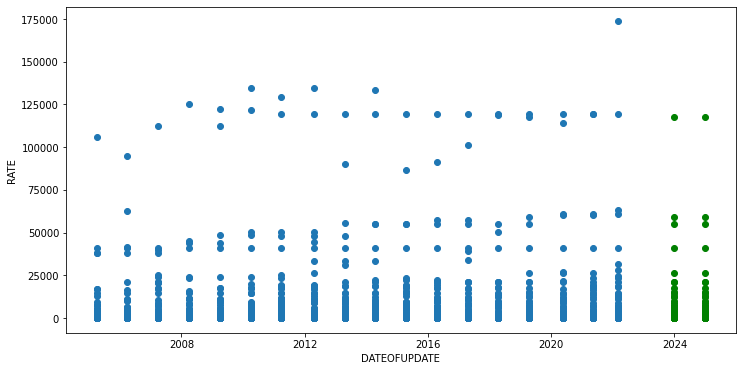

In [ ]:
plt.figure(figsize=(12,6))
ax = plt.gca()
ax.set_xlabel('DATEOFUPDATE')
ax.set_ylabel('RATE')
plt.scatter(x = data.index, y = data.RATE)
plt.scatter(x = l3.index, y = l3.predicted_mean, color='g')